In [7]:
using Entropies, DelayEmbeddings, StatsBase
import Distributions: Uniform, Normal

In [12]:
using PyPlot

In [39]:
EmKr = Vector{Vector{Float64}}(undef, 0)
EmVf = Vector{Vector{Float64}}(undef, 0)
nnb = [0:1:18; 34]
for j in nnb
    Rb = Entropies.RectangularBinning(j)
    est_knn = Kraskov(w = 3, k = j)
    est_vf = VisitationFrequency(Rb)

    ArrKr = Float64[]
    ArrVf = Float64[]
    for i in 1:50
        pts = Dataset([rand(Uniform(0, 1), 1) for i = 1:500]);
        push!(ArrKr, genentropy(pts, est_knn))
        push!(ArrVf, genentropy(pts, est_vf))
    end
    print(j)
    push!(EmKr,ArrKr)
    push!(EmVf,ArrVf)
end

#println(mean(ArrKr), "±", StatsBase.std(ArrKr))
#println(mean(ArrVf), "±", StatsBase.std(ArrVf))

012345678910111213141516171834

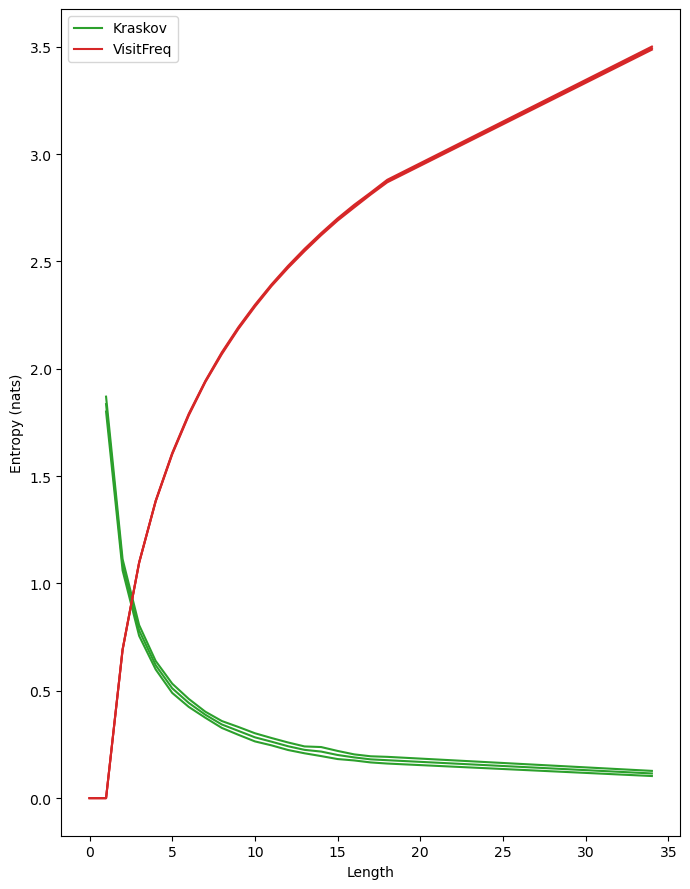

In [40]:
# Plot
f = figure(figsize = (7,9))

ax = subplot(111)
px = PyPlot.plot(nnb, mean.(EmKr); color = "C2", label = "Kraskov"); 
PyPlot.plot(nnb, mean.(EmKr) .+ StatsBase.std.(EmKr); color = "C2", label = ""); 
PyPlot.plot(nnb, mean.(EmKr) .- StatsBase.std.(EmKr); color = "C2", label = ""); 
xlabel("Length"); ylabel("Entropy (nats)"); legend()

PyPlot.plot(nnb, mean.(EmVf); color = "C3", label = "VisitFreq"); 
PyPlot.plot(nnb, mean.(EmVf) .+ StatsBase.std.(EmVf); color = "C3", label = ""); 
PyPlot.plot(nnb, mean.(EmVf) .- StatsBase.std.(EmVf); color = "C3", label = ""); 
xlabel("Length"); ylabel("Entropy (nats)"); legend()

tight_layout()
PyPlot.savefig("../plots/Knn_Vf_convergence-tests500_w=3.png")